In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

In [2]:
breast = load_breast_cancer()

In [3]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [4]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_labels = breast.target

In [6]:
breast_labels.shape

(569,)

In [7]:
labels = np.reshape(breast_labels,(569,1))

In [8]:
final_breast_data = np.concatenate([breast_data,labels], axis=1)

In [9]:
final_breast_data.shape

(569, 31)

In [10]:
breast_dataset = pd.DataFrame(final_breast_data)

In [11]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
features_labels = np.append(features,'label')

In [13]:
breast_dataset.columns = features_labels

In [14]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
#breast_dataset['label'].replace(0, 'Benign',inplace=True)
#breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [16]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [17]:
X = breast_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19.20,21,22,23,24,25,26,27,28,29]].values
Y = breast_dataset.iloc[:, 30].values
Y[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
#To split the data 80:20
from sklearn.model_selection import train_test_split

#So the train and test sets always have the same rows
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [19]:
#Perform Scaling on our Training and Testing inputs

from sklearn.preprocessing import StandardScaler
scaleX = StandardScaler()
X_train = scaleX.fit_transform(X_train)
X_test = scaleX.fit_transform(X_test)

In [20]:
C = [10, 1, 0.1, 0.001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver ='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training Accuracy:', clf.score(X_train, Y_train))
    print('Test Accuracy:', clf.score(X_test, Y_test))
    print('')

C: 10
Training Accuracy: 0.989010989010989
Test Accuracy: 0.956140350877193

C: 1
Training Accuracy: 0.9912087912087912
Test Accuracy: 0.956140350877193

C: 0.1
Training Accuracy: 0.9758241758241758
Test Accuracy: 0.9649122807017544

C: 0.001
Training Accuracy: 0.3626373626373626
Test Accuracy: 0.41228070175438597



In [21]:
#5 Folds selected
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
#Output accuracy and calculate mean and std across all folds
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 95.785% (2.377%)


In [22]:
#Import LogisticRegression from sklearn.linear_model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [23]:
#Construction of confusion matrix
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[45  2]
 [ 4 63]]


In [24]:
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        47
         1.0       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 257.44, 'Predicted label')

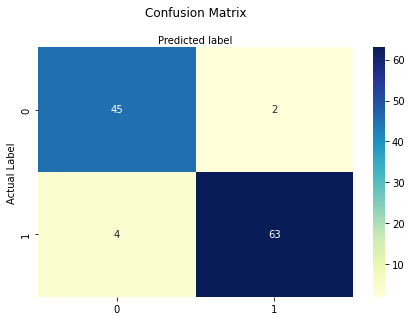

In [25]:
#Visualizing the results in a confusion matrix
#Visualize the confusion matrix using Heatmap
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names = [0,1] #Name of classes/outcomes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating the heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y =1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

In [31]:
#KFOLD K = 10
#5 Folds selected
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
#Output accuracy and calculate mean and std across all folds
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 95.254% (3.928%)


In [32]:
#Construction of confusion matrix
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[45  2]
 [ 4 63]]


In [33]:
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        47
         1.0       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 257.44, 'Predicted label')

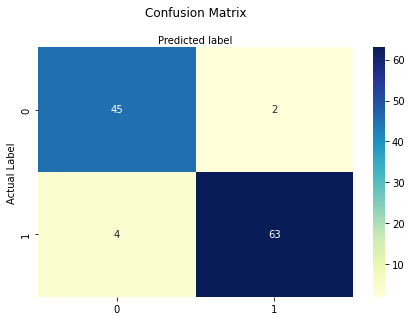

In [34]:
#Visualizing the results in a confusion matrix
#Visualize the confusion matrix using Heatmap
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names = [0,1] #Name of classes/outcomes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating the heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y =1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')